![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [102]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB
None
               age          bmi     children
count  1272.000000  1272.000000  1272.000000
mean     35.214623    30.560550     0.948899
std      22.478251     6.095573     1.303532
min     -64.000000    15.960000    -4.000000
25%      24.750000    26.180000     0.000000
50%      38.000000    30.210000     1.000000
75%      51.000000    34.485000     2.000000
max      64.000000    53.130000     5.000000
(1338, 7)
               age          bmi     children       charges
count  1272

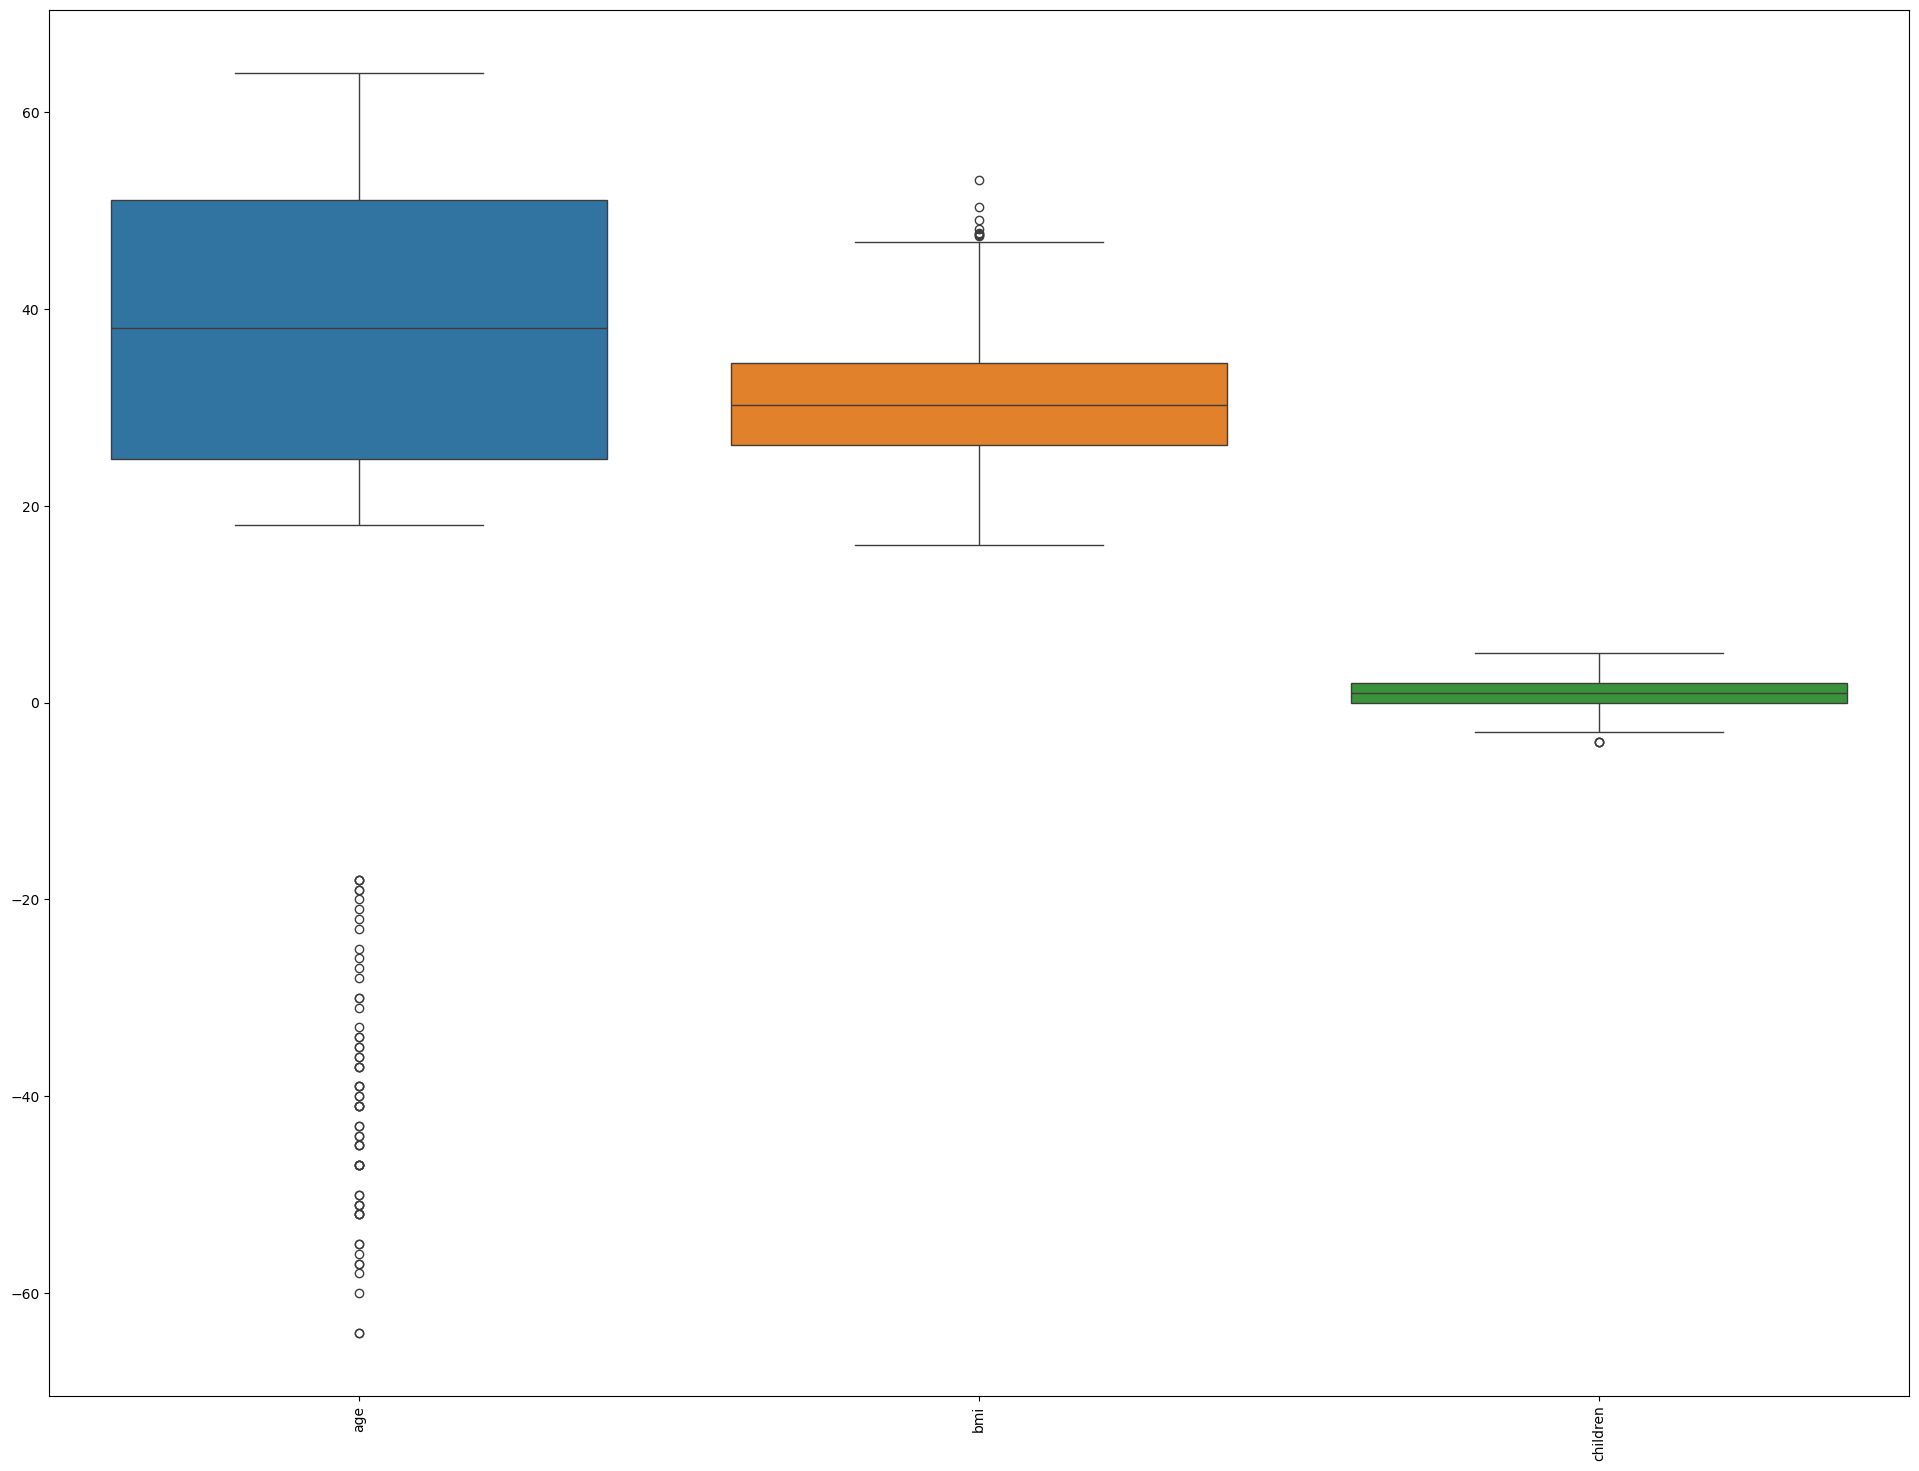

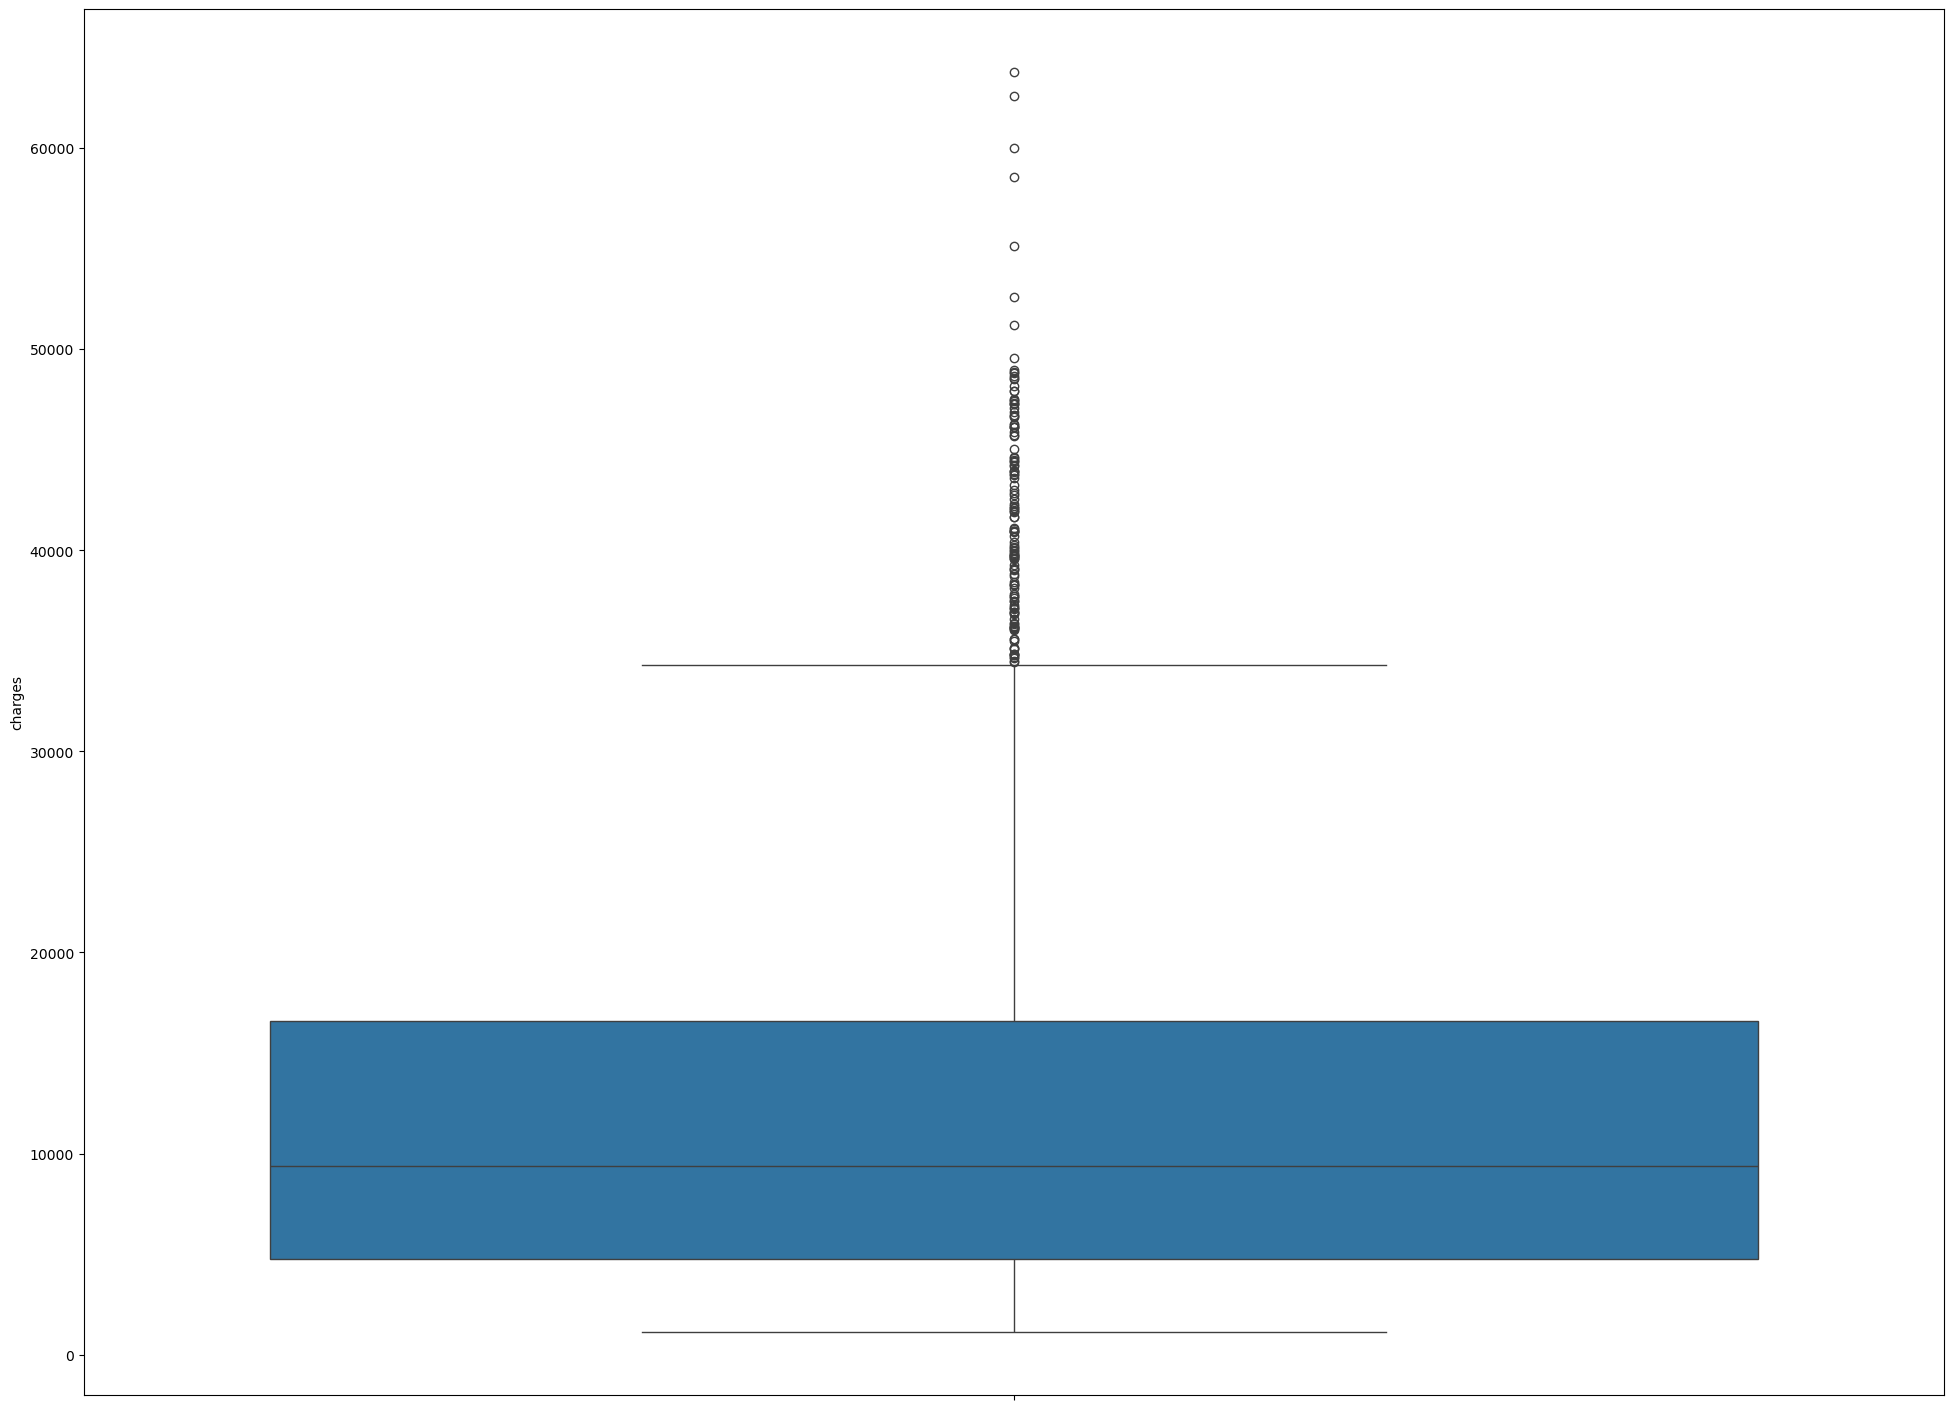

age - Upper limit: 87.0, Lower limit: -9.0
age: 0 outliers
bmi - Upper limit: 46.942499999999995, Lower limit: 13.7225
bmi: 8 outliers
children - Upper limit: 5.0, Lower limit: -3.0
children: 0 outliers
charges - Upper limit: 34349.5243875, Lower limit: -13035.983172500002
charges: 135 outliers
Number of duplicate rows: 2
age         65
sex         65
bmi         65
children    65
smoker      65
region      65
charges     65
dtype: int64
Percentage of rows with missing values: 9.73%


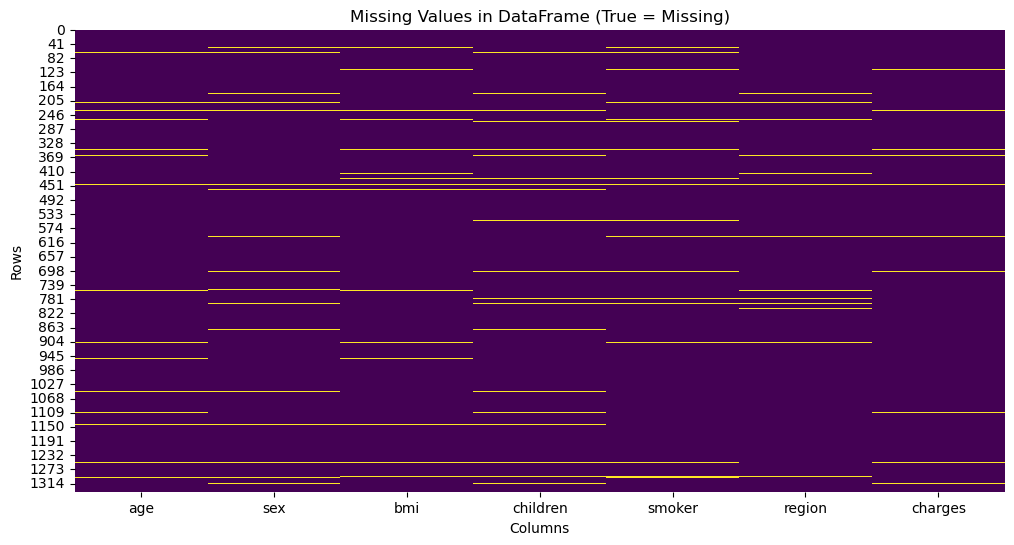

Rows before dropping missing values in 'charges': 130
Rows after dropping missing values in 'charges': 65
Rows to drop (too many missing features): 47
Rows to impute (manageable missing features): 18
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [103]:
# Data exploration
print(insurance.info())
print(insurance.describe())
print(insurance.shape)

# Data cleaning
# Convert charges to a numerical value
insurance['charges'] = insurance['charges'].replace(r'[\$,]', '', regex=True).astype(float)

print(insurance.describe())

# Split columns into categorical and numerical
categorical_cols = insurance.select_dtypes(include=['object']).columns.tolist()
numerical_cols = insurance.select_dtypes(include=['float64']).columns.tolist()

print(categorical_cols)
print(numerical_cols)

# Check unique values in categorical columns
for col in insurance[categorical_cols]:
    print ("---- %s ---" % col)
    print (insurance[col].value_counts())

# Ensure sex is labelled correctly
insurance['sex'] = insurance['sex'].replace({'M': 'male', 'man': 'male', 'F': 'female', 'woman': 'female'})

print(insurance['sex'].value_counts())

# Make region lowercase
insurance['region'] = insurance['region'].str.lower()

print(insurance['region'].value_counts())

#Check for outliers via plot without charges to be able to see all columns
plt.figure(figsize=(24,18))
sns.boxplot(data=insurance[numerical_cols].drop(columns=['charges']))
plt.xticks(rotation = 90)
plt.show()

#Checkoutliers in charges
plt.figure(figsize=(24,18))
sns.boxplot(data=insurance['charges'])
plt.xticks(rotation = 90)
plt.show()

# Remove all negative values in numerical columns as these are not valid
insurance[numerical_cols] = insurance[numerical_cols].abs()

# Check for outliers using IQR method
for i in insurance[numerical_cols]:
    col_data = insurance[i].dropna()
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3- Q1
    upper_limit = Q3 + (1.5*IQR) 
    lower_limit = Q1- (1.5*IQR)
    print(f"{i} - Upper limit: {upper_limit}, Lower limit: {lower_limit}")
    outliers = insurance[(insurance[i] < lower_limit) | (insurance[i] > upper_limit)]
    print(f"{i}: {len(outliers)} outliers")

# Only 8 outliers in bmi so we will keep them
# Keep the charges column outliers as they make sense and it is the target variable
# Log transforms or sqrt althoug reduce the impact of outliers, causes very high predictions that are not realistic

#Check for duplcate rows
duplicate_rows = insurance[insurance.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

insurance = insurance.drop_duplicates()

#Check for missing values
print(insurance.isnull().sum())

# Check how many rows have missing values
na_rows_before = insurance.isna().any(axis=1).sum()

percentage_missing = (na_rows_before / len(insurance)) * 100
print(f"Percentage of rows with missing values: {percentage_missing:.2f}%") # just under 10%

missing_bool = insurance.isna()

# Plot missing valuesto visualize the missing data
plt.figure(figsize=(12,6))
sns.heatmap(missing_bool, cbar=False, cmap='viridis')
plt.title("Missing Values in DataFrame (True = Missing)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

# Drop rows with missing values in 'log_charges' as this is our target variable
insurance = insurance.dropna(subset=['charges'])
print(f"Rows before dropping missing values in 'charges': {na_rows_before}")
print(f"Rows after dropping missing values in 'charges': {insurance.isna().any(axis=1).sum()}")

# Determine how many rows have more than 2 missing values which will be dropped whilst the rest will be imputed
missing_counts = insurance.isna().sum(axis=1)
rows_to_drop = insurance[missing_counts > 2]
rows_to_impute = insurance[(missing_counts > 0) & (missing_counts <= 2)]

print(f"Rows to drop (too many missing features): {len(rows_to_drop)}")
print(f"Rows to impute (manageable missing features): {len(rows_to_impute)}")

#Drop rows with more than 2 missing values
insurance = insurance.drop(rows_to_drop.index)

# Impute missing values in numerical columns using Iterative Imputer
iterative_imputer = IterativeImputer(random_state=1)
imputed_num_cols = iterative_imputer.fit_transform(insurance[numerical_cols])
insurance[numerical_cols] = imputed_num_cols

#Impute missing values in categorical columns using simple imputer
simple_imputer = SimpleImputer(strategy='most_frequent')
imputed_cat_cols = simple_imputer.fit_transform(insurance[categorical_cols])
insurance[categorical_cols] = imputed_cat_cols

#Check for missing values
print(insurance.isnull().sum())


In [104]:
#Data preprocessing
#Encode categorical columns using one-hot encoding
insurance = pd.get_dummies(insurance, columns=categorical_cols)

#Split data into features and target variable
X = insurance.drop('charges', axis = 1).values
y = insurance['charges'].values 

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create steps for the pipeline that scales the data and fits a linear regression model
steps = [("scaler", StandardScaler()), 
         ("linreg", LinearRegression())]

# Create the pipeline
pipeline = Pipeline(steps)

# Create a parameter space for hyperparameter tuning
params = {'linreg__copy_X': [True,False], 
          'linreg__fit_intercept': [True,False], 
            'linreg__n_jobs': [1,5,10,15,None], 
            'linreg__positive': [True,False]}

#Create scoring metrics for hyperparameter tuning
scoring = {'r2': 'r2','rmse': 'neg_root_mean_squared_error'}

# Perform hyperparameter tuning using GridSearchCV which has automatic cross-validation
tuning = GridSearchCV(pipeline, param_grid=params, scoring=scoring, refit='r2', cv=5)
tuning.fit(X_train, y_train)

# Print the best parameters and scores for training data
print("Tuned Linear Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test,y_test)))
print("Best CV R²:", tuning.cv_results_['mean_test_r2'][tuning.best_index_])
print("Best CV RMSE:", -tuning.cv_results_['mean_test_rmse'][tuning.best_index_])

# Predict on the test set
y_pred = tuning.predict(X_test)

# Test metrics
test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test R²:", test_r2)
print("Test RMSE:", test_rmse)

Tuned Linear Regression Parameters: {'linreg__copy_X': True, 'linreg__fit_intercept': True, 'linreg__n_jobs': 1, 'linreg__positive': False}, Accuracy: 0.7251947065971417
Best CV R²: 0.7350359214440765
Best CV RMSE: 6341.9956274596725
Test R²: 0.7251947065971417
Test RMSE: 5783.904326588735


In [105]:
# Test on validation data
validation_data_path = 'validation_dataset.csv'
validation_data = pd.read_csv(validation_data_path)

# Encode categorical columns in validation data using one-hot encoding
validation_data_processed = pd.get_dummies(validation_data, columns=categorical_cols)

# Predict the charges on the validation data and ensure minimum value is 1000
validation_data['predicted_charges'] = tuning.predict(validation_data_processed)

#Ensure minimum value is 1000
validation_data['predicted_charges'] = (validation_data['predicted_charges']).clip(lower=1000)

print(validation_data.describe())


             age        bmi   children  predicted_charges
count  50.000000  50.000000  50.000000          50.000000
mean   46.820000  39.539907   2.780000       23118.035903
std    21.681074  17.725844   4.026899       20038.285867
min    18.000000  18.715000   0.000000        1000.000000
25%    28.000000  27.575000   0.000000        7945.726408
50%    44.500000  33.807500   1.000000       13858.675343
75%    60.750000  40.208750   2.750000       32280.207967
max    92.000000  89.097296  13.000000       68496.072376


c:\Users\Eloise\anaconda_navigator\envs\Data_Mining\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
